In [78]:
import pandas as pd
import sklearn
import autosklearn
from autosklearn.experimental.askl2 import AutoSklearn2Classifier


In [79]:
train = pd.read_csv("data/train.csv")
train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,...,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,A,K,A,A,G,BI,A,K,AE,...,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,A,G,M,A,H,BI,C,L,F,...,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,B,H,A,D,B,BI,A,AA,AX,...,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


In [80]:
train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [81]:
train['cat10'].unique()

array(['LO', 'HJ', 'DJ', 'KV', 'DP', 'GE', 'HQ', 'HC', 'EK', 'GS', 'HG',
       'BY', 'HX', 'JK', 'FJ', 'LM', 'HK', 'MD', 'IG', 'JG', 'AN', 'AD',
       'MC', 'KW', 'CK', 'LF', 'CS', 'GK', 'DC', 'LB', 'FM', 'IH', 'LN',
       'IK', 'DF', 'IB', 'CB', 'LY', 'JW', 'FI', 'CR', 'IE', 'LE', 'HB',
       'HV', 'LG', 'BG', 'KP', 'LI', 'HL', 'BF', 'LU', 'O', 'GI', 'DQ',
       'IR', 'DV', 'HA', 'KB', 'FP', 'AT', 'IF', 'HN', 'GC', 'C', 'KC',
       'G', 'JA', 'CU', 'BC', 'AB', 'KF', 'MB', 'HE', 'BL', 'FQ', 'IA',
       'MJ', 'FO', 'V', 'JT', 'AU', 'IO', 'GQ', 'CC', 'JR', 'BM', 'HH',
       'AV', 'GT', 'I', 'IU', 'JN', 'EV', 'MV', 'EQ', 'LW', 'FN', 'IT',
       'AA', 'DK', 'IJ', 'GU', 'P', 'JH', 'CM', 'GA', 'R', 'LX', 'IX',
       'DY', 'D', 'FL', 'CP', 'GL', 'DI', 'CD', 'IV', 'FS', 'FR', 'J',
       'MP', 'MH', 'EL', 'JD', 'AP', 'AE', 'F', 'LC', 'BP', 'BI', 'MF',
       'DO', 'MG', 'MT', 'LD', 'CW', 'KS', 'BV', 'JV', 'BB', 'AM', 'KX',
       'FK', 'AH', 'LV', 'W', 'DU', 'FB', 'JX', 'KA', 'CO', '

In [82]:
test = pd.read_csv("data/test.csv")
test

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499983,A,N,A,D,F,BI,A,AF,AX,...,0.361426,0.351946,0.327670,0.205547,0.679195,0.485967,0.319130,0.520681,0.519545,0.427119
199996,499984,B,I,A,B,E,BI,A,AS,S,...,0.551106,0.628843,0.677765,0.624935,0.555306,0.242424,0.700829,0.531728,0.528427,0.922645
199997,499987,A,L,D,A,H,BI,A,AN,J,...,0.812384,0.803348,0.324762,0.665624,0.488447,0.853213,0.578641,0.811941,0.537106,0.531758
199998,499994,A,K,A,C,F,BI,A,R,BM,...,0.811282,0.820635,0.561449,0.797434,0.555089,0.746532,0.369986,0.438712,0.715524,0.381978


## Organizando os dados

In [83]:
vect = ['cat'+str(i) for i in range(19)]
vect.remove("cat10")
vect

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18']

In [84]:
trainDummies = pd.get_dummies(train,columns = vect)
trainDummies

,id,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0,LO,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,...,0,1,0,0,0,1,0,1,0,0
1,1,HJ,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,...,0,0,0,0,0,1,0,1,0,0
2,2,DJ,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,...,0,1,0,0,0,1,0,1,0,0
3,3,KV,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,...,0,1,0,0,0,1,0,1,0,0
4,4,DP,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,HG,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,...,0,0,0,0,0,1,0,1,0,0
299996,499995,HK,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,...,0,1,0,0,0,1,0,1,0,0
299997,499996,HC,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,...,0,0,0,0,0,1,0,0,0,1
299998,499997,BF,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,...,0,0,0,0,0,1,1,0,0,0


In [85]:
testDummies = pd.get_dummies(test,columns = vect)
testDummies

,id,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,5,LF,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,...,0,1,0,0,0,1,0,1,0,0
1,6,MC,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,...,0,0,0,0,0,1,0,1,0,0
2,8,FN,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,...,0,1,0,0,0,1,0,1,0,0
3,9,HK,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,...,0,1,0,1,0,0,0,1,0,0
4,11,HX,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499983,DP,0.451496,0.361426,0.351946,0.327670,0.205547,0.679195,0.485967,0.319130,...,0,0,0,0,1,0,0,1,0,0
199996,499984,IE,0.862988,0.551106,0.628843,0.677765,0.624935,0.555306,0.242424,0.700829,...,0,1,0,0,0,1,0,1,0,0
199997,499987,HV,0.463067,0.812384,0.803348,0.324762,0.665624,0.488447,0.853213,0.578641,...,0,0,0,0,0,1,0,1,0,0
199998,499994,HK,0.519671,0.811282,0.820635,0.561449,0.797434,0.555089,0.746532,0.369986,...,0,1,0,0,0,1,0,1,0,0


In [87]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


testDummies['cat10'] = le.fit_transform(test['cat10'])
trainDummies['cat10'] = le.fit_transform(train['cat10'])

## Dividindo o dataset em Train Test

In [89]:
cols = trainDummies.drop('target',axis=1).columns
cols

Index(['id', 'cat10', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7',
       ...
       'cat16_C', 'cat16_D', 'cat17_A', 'cat17_B', 'cat17_C', 'cat17_D',
       'cat18_A', 'cat18_B', 'cat18_C', 'cat18_D'],
      dtype='object', length=337)

In [90]:
X = trainDummies[cols]
y = trainDummies['target']

In [91]:
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)
X_train

,id,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
114008,190338,174,0.678415,0.419589,0.457227,0.351334,0.244934,0.121816,0.148313,0.565027,...,0,0,0,0,0,1,0,1,0,0
272999,455067,163,0.371348,0.721047,0.706050,0.602039,0.286194,0.554258,0.715328,0.322555,...,0,1,0,0,0,1,0,1,0,0
144155,240405,37,0.474567,0.928286,0.937476,0.328642,0.782450,0.681942,0.876370,0.541191,...,0,0,0,0,0,1,0,1,0,0
75073,125538,170,0.390434,0.556213,0.606570,0.602505,0.733588,0.681048,0.340716,0.472032,...,0,1,0,0,0,1,0,1,0,0
141339,235739,63,0.486736,0.528580,0.460650,0.193948,0.255713,0.418377,0.457198,0.386419,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,35885,75,0.288228,0.323449,0.235495,0.319782,0.636179,0.801817,0.614657,0.355865,...,0,1,0,0,0,1,0,1,0,0
117583,196334,245,0.667446,0.423518,0.490462,0.640739,0.629520,0.257882,0.186111,0.568047,...,0,1,0,0,0,1,0,1,0,0
73349,122647,105,0.542337,0.486791,0.451656,0.302041,0.715124,0.555428,0.351841,0.327002,...,0,0,0,0,0,1,0,1,0,0
267336,445611,47,0.292112,0.180240,0.338685,0.305206,0.792968,0.736119,0.615253,0.223897,...,0,1,0,1,0,0,0,1,0,0


## Aplicando o autoSklearn

In [92]:
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)

/home/raitocan/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/raitocan/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


[WARNING] [2022-02-25 16:19:39,447:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


AutoSklearnClassifier(per_run_time_limit=360)

In [93]:
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))


Accuracy score 0.84904


In [94]:
predict = automl.predict(testDummies)
gd_sub = pd.read_csv("data/sample_submission.csv")
gd_sub['target'] = predict
gd_sub.to_csv('./submission.csv',index=False)
gd_sub

,id,target
0,5,0
1,6,1
2,8,0
3,9,0
4,11,0
...,...,...
199995,499983,1
199996,499984,0
199997,499987,1
199998,499994,0


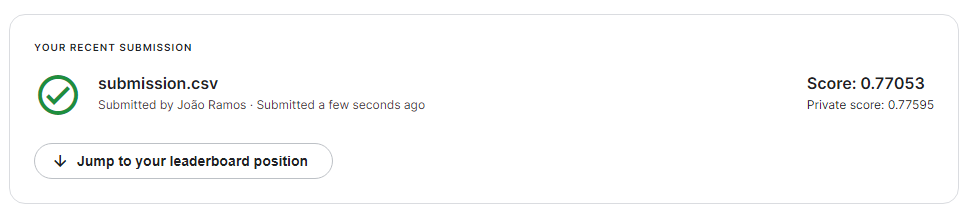